# Monte Carlo Simulation
Computers can be used to generate pseudo-random numbers. For most practicaly purposes these pseudo-random numbers can be used to immitate real random variables. This permits us to examine properties of random variables using a computer instead of theoretical or analytical derivations. One very useful aspect of this concept is that we can create simulated data to test out ideas or competing methods without actually having to perform laboratory experiments.

Simulations can also be used to check theoretical or analytical results. Also, many of the theoretical results we use in statistics are based on asymptotics: they hold when the sample size goes to infinity. In practice we never have an infinite number of samples so we may want to know how well the theory works with our actual sample size. Sometimes we can answer this question analytically, but not always. Simulations are extremely useful in these cases.

The technique we used to motivate random variables and null distribution was a type of monte carlo simulation. We had access to population data and generated samples at randome. Here we introduce a new dataset and focus specifically on Monte Carlos simulations. The dataset contains baby weights and several covariants, one of which is whether the mother smokes. Babies of smoking mothers tend to weigh slightly less. Say we want to know if a sample size of 10 is enough to use the central limit theorem to approximate the distribution of the t-statistic as normal with mean 0 and standard deviation 1. We will use Monte Carlo simulations to determine if10 large enough to use this approximantion? Let’s use a monte carlo simulation to corroborate.

Below is the code we used to obtain random sample and then the difference:

In [64]:
dat <- read.table("babies.txt",header=TRUE)
smokers <- sample(dat$bwt[dat$smoke==1],10)
nonsmokers <- sample(dat$bwt[dat$smoke==0],10)
mean(smokers)-mean(nonsmokers)

[1] -24

* But as we have learned this is a random variabe and different random samples give us a different answer

In [65]:
for(i in 1:10) {
  smokers <- sample(dat$bwt[dat$smoke==1],10)
  nonsmokers <- sample(dat$bwt[dat$smoke==0],10)
  cat("observed difference = ",mean(smokers)-mean(nonsmokers),"ounces\n")
}

observed difference =  -4.7 ounces
observed difference =  -22.2 ounces
observed difference =  -14.4 ounces
observed difference =  -10.7 ounces
observed difference =  -7.8 ounces
observed difference =  -13.5 ounces
observed difference =  -5.2 ounces
observed difference =  -19.3 ounces
observed difference =  -11.4 ounces
observed difference =  -4 ounces


* As noted earlier, in practice we can afford to measure so many samples, but on a computer it is as easy as writing a loop. Let’s take 1,000 random samples under the null and re-computing the t-statistic:

In [66]:
ttestgenerator <- function(n) {
  # note that here we have a false "smokers" group where we actually
  # sample from the nonsmokers. this is because we are modeling the *null*
  smokers = sample(dat$bwt[dat$smoke==0], n)
  nonsmokers = sample(dat$bwt[dat$smoke==0], n)
  return((mean(smokers)-mean(nonsmokers))/sqrt(var(smokers)/n + var(nonsmokers)/n))
  }
ttests <- replicate(1000, ttestgenerator(10))

* With 1,000 simulated ocurrences of this random variable we can now get a gimplse of it’s distribution



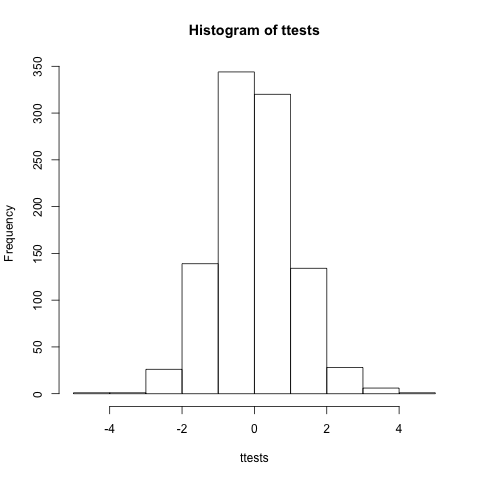

In [67]:
hist(ttests)

* Now let’s check on the theory used previously. Under the null hypothesis the difference in means is 0. To recreate this with our simulation we will sample non-smokers twice: there can’t be a difference in population average if we sample from the same population.
So is the distribution of this t-statistic well approximated by the normal distribution?



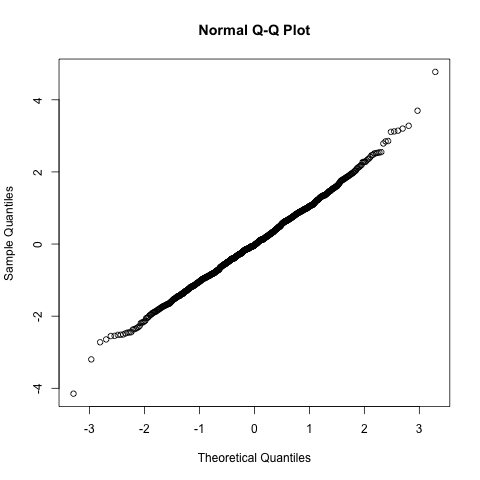

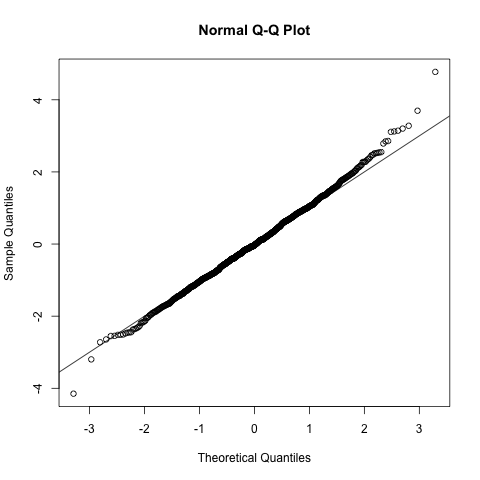

In [68]:
qqnorm(ttests)
abline(0,1)

* This looks like a very good approximation. So for this particular population a sample size of 10 was large enough to use the CLT approximation. How about 3?



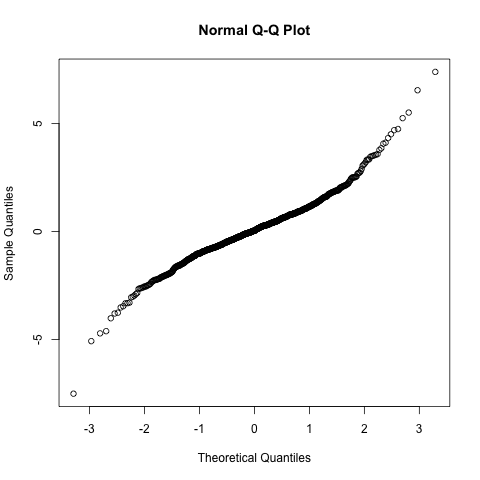

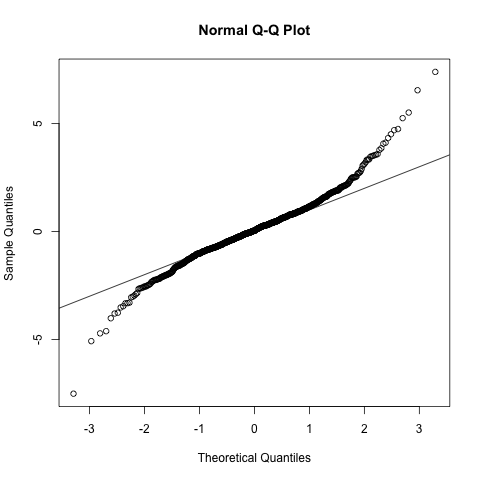

In [69]:
ttests <- replicate(1000, ttestgenerator(3))
qqnorm(ttests)
abline(0,1)

Now we see that the large quantiles (refered to by statisticians as the tails) are large than expected. In the previous module we explained that when the sample size is not large enough and the population values follow a normal distribution then the t-distribution is a better approximation. Our simulation results seem to confirm this:



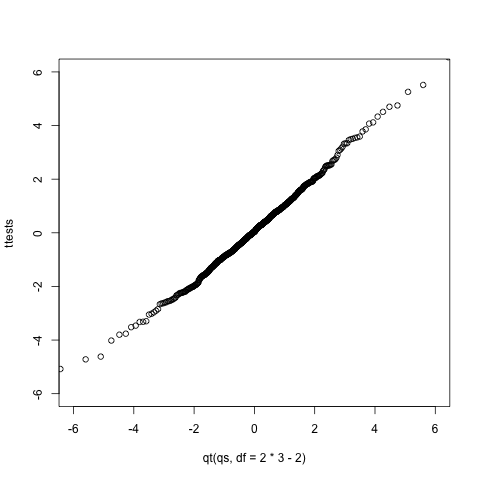

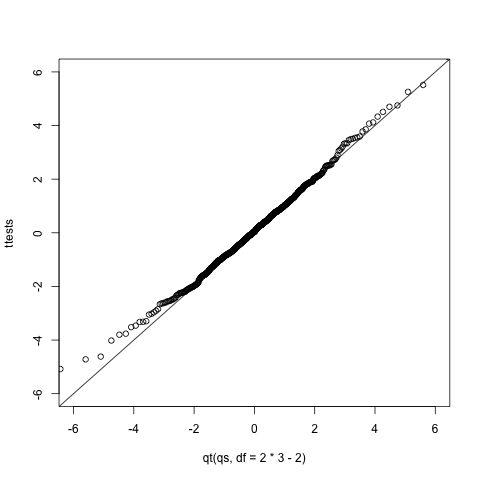

In [70]:
qs <- (seq(0,999)+0.5)/1000
qqplot(qt(qs,df=2*3-2),ttests,xlim=c(-6,6),ylim=c(-6,6))
abline(0,1)

The t-distribution is a much better approximation in this case but it is still not perfect. This is due to the fact that the original data is not that well approximated by the normal distribution.

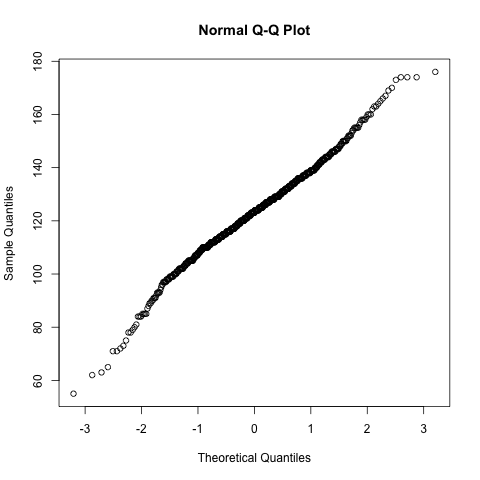

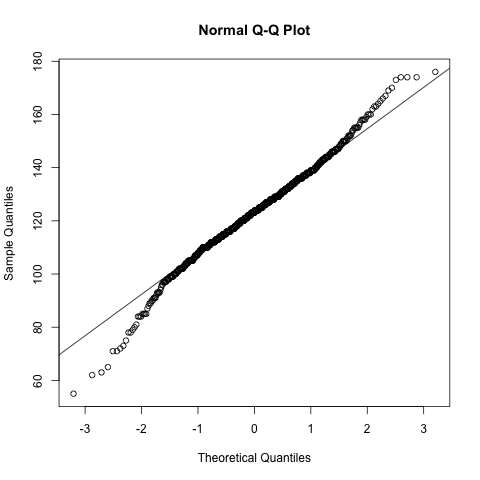

In [71]:
qqnorm(dat$bwt[dat$smoke==0])
qqline(dat$bwt[dat$smoke==0])

# Parametric simulations for the observations
In the previous section we sampled from the entire population. In many cases we don’t have access to data from the entire population. In these cases we can simulate the populaton data as well, using what is called a “parametric simulation”. This means that we take parameters from the real data (here the mean and the standard deviation), and plug these into a model (here the normal distribution). This is acually the most common form of Monte Carlo simulation.

For the case of wieghts we could use:

In [72]:
nonsmokerweights <- rnorm(5000, 
                          mean=mean(dat$bwt[dat$smoke==0]), 
                          sd=sd(dat$bwt[dat$smoke==0]))

#### Homework Q1.1~Q1.2

In [73]:
babies = read.table("babies.txt", header=TRUE)

#The population of nonsmoker baby weights is:
bwt.nonsmoke = babies$bwt[babies$smoke==0]
pop.var = var(bwt.nonsmoke) # And the population variance is 302.7144:
pop.var

[1] 302.7144

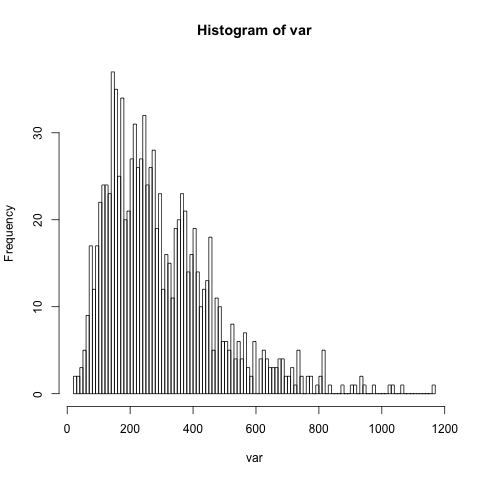

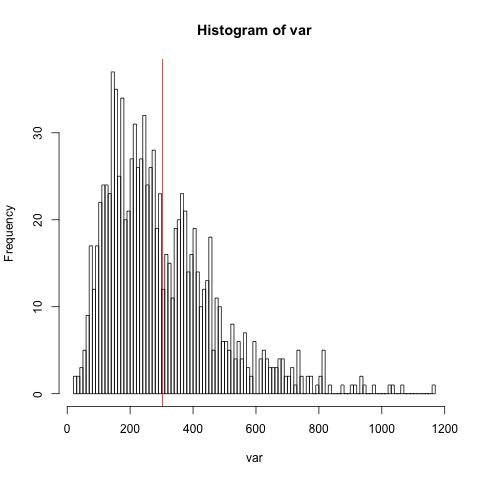

[1] 0.158

In [74]:
var = replicate(1000, var(sample(bwt.nonsmoke,10)))
hist(var,breaks=100)
abline(v=pop.var,col="red")
mean(var > 1.5*pop.var)

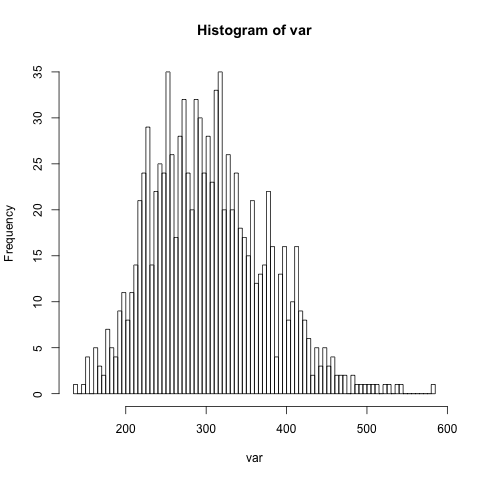

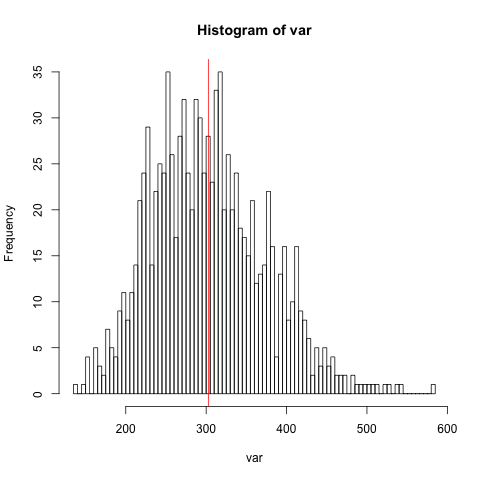

[1] 0.025

In [75]:
var = replicate(1000, var(sample(bwt.nonsmoke,50)))
hist(var,breaks=100)
abline(v=pop.var,col="red")
mean(var > 1.5*pop.var)

* PLOT OF SAMPLE VARIANCE AND POPULATION VARIANCE

Finally, we'll make a plot to see how the sample variance estimates gets better (closer to the population variance) as the sample size increases. First, we'll make a vector of sample sizes from 2 to 400:

sample.size = 2:400

Now, for each sample size, take a sample from the nonsmokers of that size, and calculate the variance:

var.estimate = sapply(sample.size, function(n) var(sample(bwt.nonsmoke, n)))

Finally, plot these sample variances over their sample sizes, and draw a horizontal line of the population variance:

plot(sample.size, var.estimate)
abline(h=pop.var, col="blue")

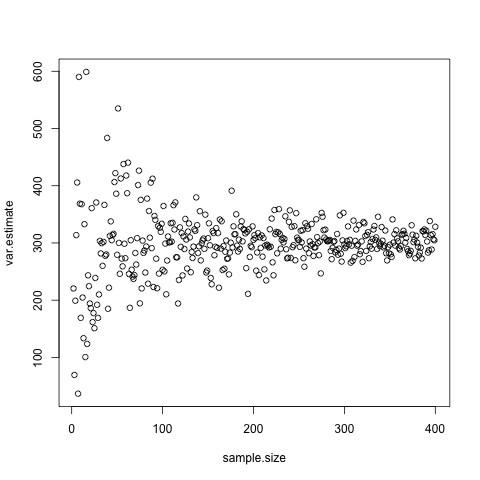

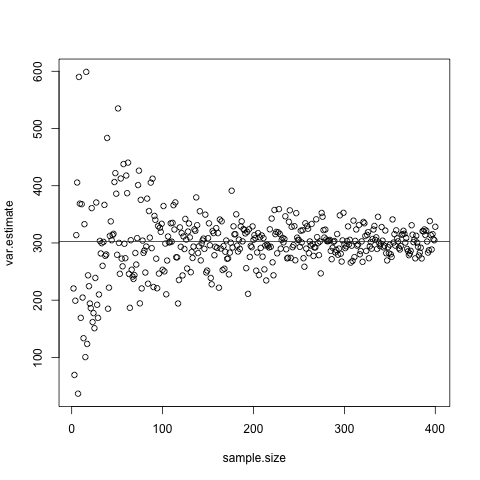

In [76]:
sample.size = 2:400
var.estimate = sapply(sample.size, function(n) var(sample(bwt.nonsmoke, n)))
plot(sample.size, var.estimate)
abline(h=pop.var, col="blue")

# Permutation tests
Suppose we have a situation in which none of the standard statistical tools apply. We have computed a summary statisitic, such as the difference in mean, but do not have a useful approximation such as that provided by the CLT. In practice, we do not have access to all values in the population so we can’t perform a simulation as done above. Permutation can be useful in these scenarios.

We are back to the scenario were we only have 10 measurements for each group.



In [77]:
dat <- read.table("babies.txt", header=TRUE)
set.seed(0)
N <- 50
smokers <- sample(dat$bwt[dat$smoke==1],N)
nonsmokers <- sample(dat$bwt[dat$smoke==0],N)
obs <- mean(smokers)-mean(nonsmokers)

Is the observed difference significant? Remember we are pretending that we can’t use the CLT or the t-distribution approximations. How can we determine the distribution of this difference under the null that there is no difference? Permutations tests take advantege of the fact that if there is no difference the shuffling the data should not matter. So we shuffle the men and women labels, say, 1,000 and see how much the results matter.

Generate a null distribution by shuffling the data



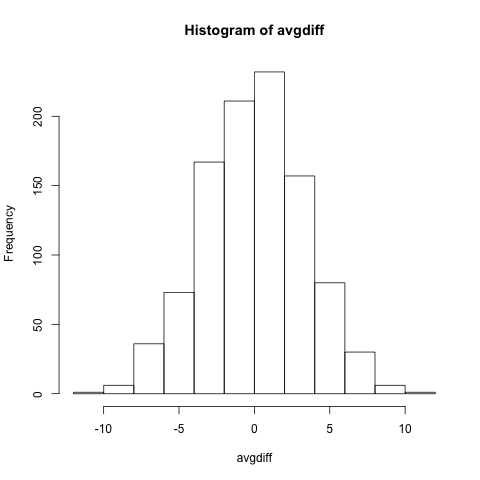

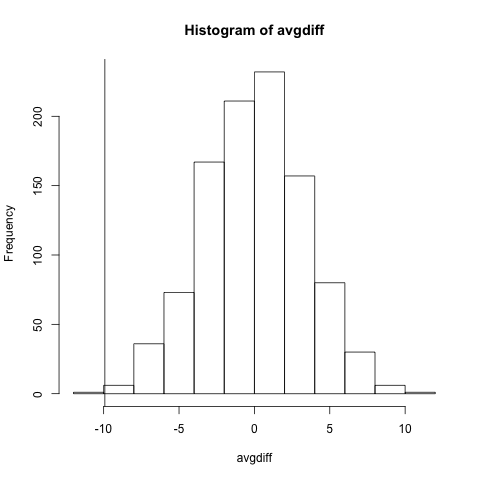

In [78]:
avgdiff <- replicate(1000, {
    all <- sample(c(smokers,nonsmokers))
    smokersstar <- all[1:N]
    nonsmokersstar <- all[(N+1):(2*N)]
  return(mean(smokersstar) - mean(nonsmokersstar))
})
hist(avgdiff)
abline(v=obs)


How many of the null means are bigger than the observed value? That proportion would be the p-value for the null.



In [79]:
# the proportion of permutations with larger difference :p-value
mean(abs(avgdiff) > abs(obs))

[1] 0.002

Note that if we repeat for N=10, the observed difference is not significant using this approach. It is important to keep in mind that there is no theoretical guarantee that the null distribution estimated from permutations approximates the actual null distribution. Note for example that if there is a real differences, some of the permutations will be unblanced and will contain signal. This implies that the null distribution created with permutations will have larger tails than the actual null distribution. This is why permutations result in conservative p-values. For this reason when we have few samples we can’t do permutations.

Note also that permutations tests still have assumptions: samples are assumed to be independent. If there is hidden structure in your data, then permutation tests can actually end up with null distributions that underestimate the details because the permutations amy destroy the existing structure in the original data.

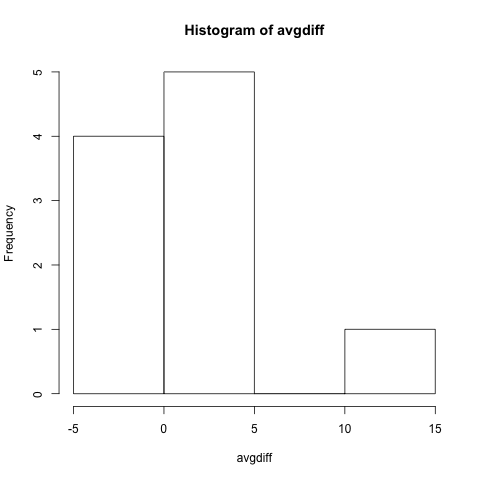

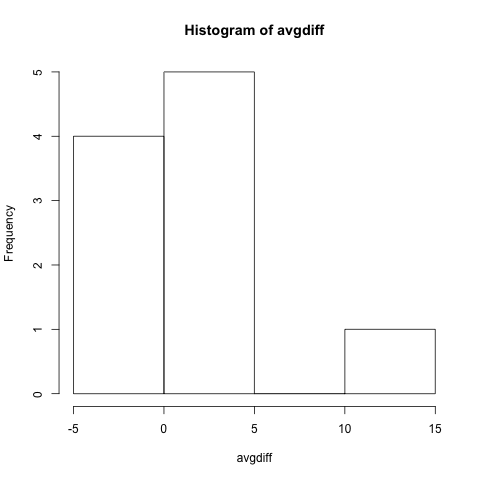

In [80]:
avgdiff <- replicate(10, {
    all <- sample(c(smokers,nonsmokers))
    smokersstar <- all[1:N]
    nonsmokersstar <- all[(N+1):(2*N)]
  return(mean(smokersstar) - mean(nonsmokersstar))
})
hist(avgdiff)
abline(v=obs)

#### Homeworl Q2.1

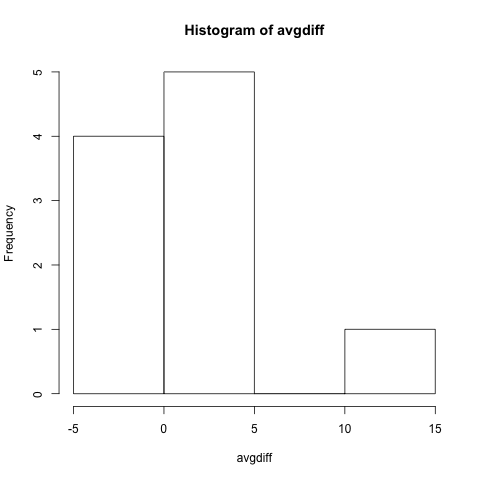

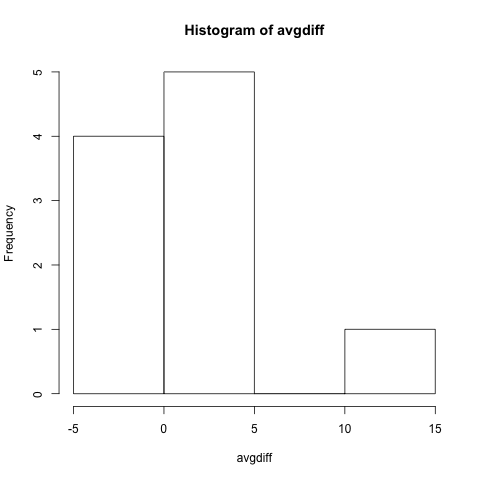

[1] 0.001

In [81]:
avgdiff_median <- replicate(1000, {
    all <- sample(c(smokers,nonsmokers))
    smokersstar <- all[1:N]
    nonsmokersstar <- all[(N+1):(2*N)]
  return(median(smokersstar) - median(nonsmokersstar))
})
obs_median <- median(smokers)-median(nonsmokers)
hist(avgdiff)
abline(v=obs,col="red")
mean(abs(avgdiff_median) > abs(obs_median))